In [310]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
from mpl_toolkits.mplot3d import axes3d

In [311]:
# Loading the csv file with pandas

filename = 'forestfires.csv'
df = pd.read_csv(filename)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [312]:
# One hot encode the months and days

df['month'] = pd.Categorical(df['month'])
df['month'] = df.month.cat.codes

df['day'] = pd.Categorical(df['day'])
df['day'] = df.day.cat.codes

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [313]:
# Check that the one hot encoding worked

data.dtypes

Y          int64
month       int8
day         int8
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
dtype: object

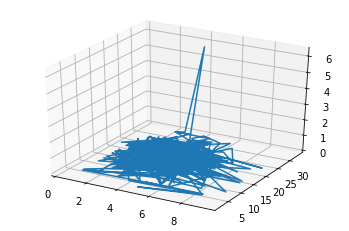

In [314]:
# Exploring the data
# The fields in the numpy array can be changed to any column in the dataset.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(np.array(data.wind), np.array(data.temp), np.array([data.rain]))
plt.show()

In [315]:
# Now the data will be prepared to go into training.
# tf.data.Dataset will be used

target = df.pop('area')

In [316]:

dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))
values = 0
for element in dataset:
    values += 1
    print(element)
print(values)

t64, numpy=746.28>)
(<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([  6. ,   3. ,   5. ,   5. ,  92.7, 164.1, 575.8,   8.9,  26.3,
        39. ,   3.1,   0. ])>, <tf.Tensor: shape=(), dtype=float64, numpy=7.02>)
(<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([ 6. ,  5. ,  7. ,  6. , 93.4, 17.3, 28.3,  9.9, 13.8, 24. ,  5.8,
        0. ])>, <tf.Tensor: shape=(), dtype=float64, numpy=0.0>)
(<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([  2. ,   4. ,   1. ,   3. ,  92. , 203.2, 664.5,   8.1,  24.9,
        42. ,   5.4,   0. ])>, <tf.Tensor: shape=(), dtype=float64, numpy=2.44>)
(<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([  2. ,   5. ,   1. ,   3. ,  91.6, 181.3, 613. ,   7.6,  24.8,
        36. ,   4. ,   0. ])>, <tf.Tensor: shape=(), dtype=float64, numpy=3.05>)
(<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([  8. ,   8. ,   1. ,   6. ,  91.7, 191.4, 635.9,   7.8,  26.2,
        36. ,   4.5,   0. ])>, <tf.Tensor: shape=(), dtype=float64, numpy=185.7

In [317]:
# Split the data for training and validation

train_dataset = dataset.shuffle(len(df)).batch(5)
x = 0
for element in train_dataset:
    x += 1
    print(element)
print(x)

  94.8, 222.4, 698.6,  13.9,  27.5,
         27. ,   4.9,   0. ],
       [  4. ,   3. ,   1. ,   4. ,  91.7, 114.3, 661.3,   6.3,  17.6,
         45. ,   3.6,   0. ],
       [  4. ,   3. ,  11. ,   5. ,  91.9, 111.7, 770.3,   6.5,  15.9,
         53. ,   2.2,   0. ],
       [  8. ,   3. ,   6. ,   1. ,  88.2,  96.2, 229. ,   4.7,  14.3,
         79. ,   4. ,   0. ],
       [  6. ,   3. ,   9. ,   5. ,  79.5,   3. , 106.7,   1.1,  11.8,
         31. ,   4.5,   0. ],
       [  4. ,   4. ,   7. ,   5. ,  88.1,  25.7,  67.6,   3.8,  14.1,
         43. ,   2.7,   0. ]])>, <tf.Tensor: shape=(8,), dtype=float64, numpy=array([  0.  ,   8.85, 746.28,   0.  ,   2.93,   1.94,   0.  ,   0.  ])>)
(<tf.Tensor: shape=(8, 12), dtype=float64, numpy=
array([[  3. ,   4. ,   1. ,   5. ,  92.1, 152.6, 658.2,  14.3,  21. ,
         32. ,   3.1,   0. ],
       [  8. ,   6. ,   1. ,   1. ,  92.1, 207. , 672.6,   8.2,  21.1,
         54. ,   2.2,   0. ],
       [  6. ,   5. ,   6. ,   1. ,  90.4,  93.3, 298.1

In [335]:
# Building the neural network with tensorflow
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(12,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='BinaryCrossentropy', optimizer='SGD', metrics=['accuracy'])

In [336]:
# Fitting the model

model.fit(train_dataset, epochs=16)

Epoch 1/16
65/65 [==============================] - 0s 1ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 2/16
65/65 [==============================] - 0s 1ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 3/16
65/65 [==============================] - 0s 1ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 4/16
65/65 [==============================] - 0s 1ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 5/16
65/65 [==============================] - 0s 1ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 6/16
65/65 [==============================] - 0s 1ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 7/16
65/65 [==============================] - 0s 1ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 8/16
65/65 [==============================] - 0s 1ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 9/16
65/65 [==============================] - 0s 1ms/step - loss: 198.1689 - accuracy: 0.4778
Epoch 10/16
65/65 [==============================] - 0s 1ms/step - loss: 198.1688 - accuracy: 0.4778